\begin{center}
Gabe Morris
\end{center}

In [1]:
# Notebook Preamble
%config ZMQInteractiveShell.ast_node_interactivity = 'all'
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.style.use('maroon_ipynb.mplstyle')

t, s = sp.symbols('t s')
K_pot, K_P, K_d, K_a, K_T, L, R, I_e = sp.symbols(r'K_{pot} K_P K_d K_a K_T L R I_e')
Th, Th_r, T = sp.Function(r'\theta')(s), sp.Function(r'\theta_r')(s), sp.Function('T')(s)

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 6643 & Homework 10 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 10.67
## Given

\begin{center}
\includegraphics{images/fig2}
\end{center}

The figure above shows a system for controlling the angular position of a load, such as an antenna. The figure below shows the block diagram for PD control of this system using a field-controlled motor. Use the following values:

* $K_a=1\frac{V}{V}$
* $K_{pot}=2\frac{V}{rad}$
* $I_2=5\times10^{-4}\,kg\cdot m^2$
* $R=0.3\,\Omega$
* $K_T=0.6\,N\cdot m/A$
* $I_1=0.01\,kg\cdot m^2$
* $I_3=0.2\,kg\cdot m^2$

\begin{center}
\includegraphics{images/fig1}
\end{center}

The inertia $I_e$ in the block diagram is the equivalent inertia of the entire system, as felt on the motor shaft.

## Find
a. Assume that the motor inductance is very small and set $L=0$. Compute $I_e$, obtain the transfer function $\frac{\theta(s)}{\theta_r(s)}$, and compute the values of the control gains $K_P$ and $K_d$ to meet the following specifications: $\zeta=1$ and $\tau=0.5\,s$.
b. Using the values of $K_P$ and $K_d$ computed in part (a), and the value $L=0.015\,H$, obtain the transfer function $\frac{\theta(s)}{\theta_r(s)}$.

## Solution

In [2]:
# Define the givens here
K_a_, K_pot_, K_T_ = 1, 2, 0.6
I1, I2, I3 = 0.01, 5e-4, 0.2
R_ = 0.3

### Part A
I have become untethered when it comes to calculating the equivalent inertia. The relationship is,

$$I_e=I_1+\frac{1}{4}I_2+\frac{1}{36}I_3$$

In [3]:
# Getting Ie
Ie_ = I1 + sp.Rational(1, 4)*I2 + sp.Rational(1, 36)*I3
Ie_  # kg m^2

0.0156805555555556

The transfer function may be obtained by using algebra from the block diagram, then solving.

In [4]:
# Getting the transfer function
eq1 = sp.Eq((Th_r*K_pot - K_pot*Th)*(K_P + K_d*s)*K_a*K_T/(L*s + R)*1/(I_e*s**2)*1/6, Th)
eq1
T_sol = sp.solve(eq1.subs(Th, T*Th_r), T)[0]
sp.Eq(Th/Th_r, T_sol)

Eq(K_T*K_a*(K_P + K_d*s)*(-K_{pot}*\theta(s) + K_{pot}*\theta_r(s))/(6*I_e*s**2*(L*s + R)), \theta(s))

Eq(\theta(s)/\theta_r(s), K_T*K_a*K_{pot}*(K_P + K_d*s)/(6*I_e*L*s**3 + 6*I_e*R*s**2 + K_P*K_T*K_a*K_{pot} + K_T*K_a*K_d*K_{pot}*s))

Now, the denominator is the characteristic equation.

In [5]:
_, d = sp.fraction(T_sol)
poly = d.subs(L, 0)
poly
m, c, k = sp.Poly(poly, s).coeffs()
eq1 = sp.Eq(0.5, 2*m/c)
eq2 = sp.Eq(1, c/(2*sp.sqrt(m*k)))
eq1
eq2

6*I_e*R*s**2 + K_P*K_T*K_a*K_{pot} + K_T*K_a*K_d*K_{pot}*s

Eq(0.5, 12*I_e*R/(K_T*K_a*K_d*K_{pot}))

Eq(1, sqrt(6)*K_T*K_a*K_d*K_{pot}/(12*sqrt(I_e*K_P*K_T*K_a*K_{pot}*R)))

Now substituting in the values, the gains may be acquired.

In [6]:
sub_list = [(I_e, Ie_), (R, R_), (K_T, K_T_), (K_a, K_a_), (K_pot, K_pot_)]

gain_sol = sp.solve([eq1, eq2], (K_P, K_d), dict=True)[0]
sp.Eq(K_d, gain_sol[K_d])
sp.Eq(K_P, gain_sol[K_P])
K_P_, K_d_ = gain_sol[K_P].subs(sub_list), gain_sol[K_d].subs(sub_list)
sp.Eq(K_P, K_P_)
sp.Eq(K_d, K_d_)

Eq(K_d, 24.0*I_e*R/(K_T*K_a*K_{pot}))

Eq(K_P, 24.0*I_e*R/(K_T*K_a*K_{pot}))

Eq(K_P, 0.0940833333333333)

Eq(K_d, 0.0940833333333333)

The transfer function and solution with $L=0\,H$ is,

In [7]:
sub_0 = sub_list + [(K_d, K_d_), (K_P, K_P_), (L, 0)]
sub_15 = sub_list + [(K_d, K_d_), (K_P, K_P_), (L, 0.015)]
T_sol_ = T_sol.subs(sub_0)
sp.Eq(Th/Th_r, T_sol_.simplify())
Th_s = T_sol_*1/s
sp.Eq(sp.Eq(Th, Th_s.simplify()), 4*(s + 1)/(s*(s**2 + 4*s + 4)), evaluate=False)
Th_s = 4*(s + 1)/(s*(s**2 + 4*s + 4))
th_tA = (sp.inverse_laplace_transform(Th_s, s, t)/sp.Heaviside(t)).expand()
sp.Eq(sp.Function(r'\theta')(t), th_tA)

Eq(\theta(s)/\theta_r(s), 0.1129*(s + 1)/(0.028225*s**2 + 0.1129*s + 0.1129))

Eq(Eq(\theta(s), 0.1129*(s + 1)/(s*(0.028225*s**2 + 0.1129*s + 0.1129))), (4*s + 4)/(s*(s**2 + 4*s + 4)))

Eq(\theta(t), 2*t*exp(-2*t) + 1 - exp(-2*t))

### Part B
With $L=0.015\,H$ and everything else staying the same, the transfer function is,

In [8]:
%config ZMQInteractiveShell.ast_node_interactivity = 'last_expr'
T_sol_B = T_sol.subs(sub_15)
sp.Eq(sp.Eq(Th/Th_r, T_sol_B.simplify()), 80*(s + 1)/(s**3 + 20*s**2 + 80*s + 80), evaluate=False)
T_sol_B = 80*(s + 1)/(s**3 + 20*s**2 + 80*s + 80)
Th_s = T_sol_B*1/s
sp.Eq(Th, Th_s)
# sp.inverse_laplace_transform(sp.apart(Th_s).expand(), s, t)
# th_tB = sp.inverse_laplace_transform(Th_s, s, t)
# th_tB
th_tB = 1.16*sp.exp(-1.56*t) - 2.64*sp.exp(-3.4*t) + 0.477*sp.exp(-15*t) + 1
sp.Eq(sp.Function(r'\theta')(t), th_tB)

Eq(Eq(\theta(s)/\theta_r(s), 0.1129*(s + 1)/(0.00141125*s**3 + 0.028225*s**2 + 0.1129*s + 0.1129)), (80*s + 80)/(s**3 + 20*s**2 + 80*s + 80))

Eq(\theta(s), (80*s + 80)/(s*(s**3 + 20*s**2 + 80*s + 80)))

Eq(\theta(t), 1 - 2.64*exp(-3.4*t) + 1.16*exp(-1.56*t) + 0.477*exp(-15*t))

For verification, here is a plot.

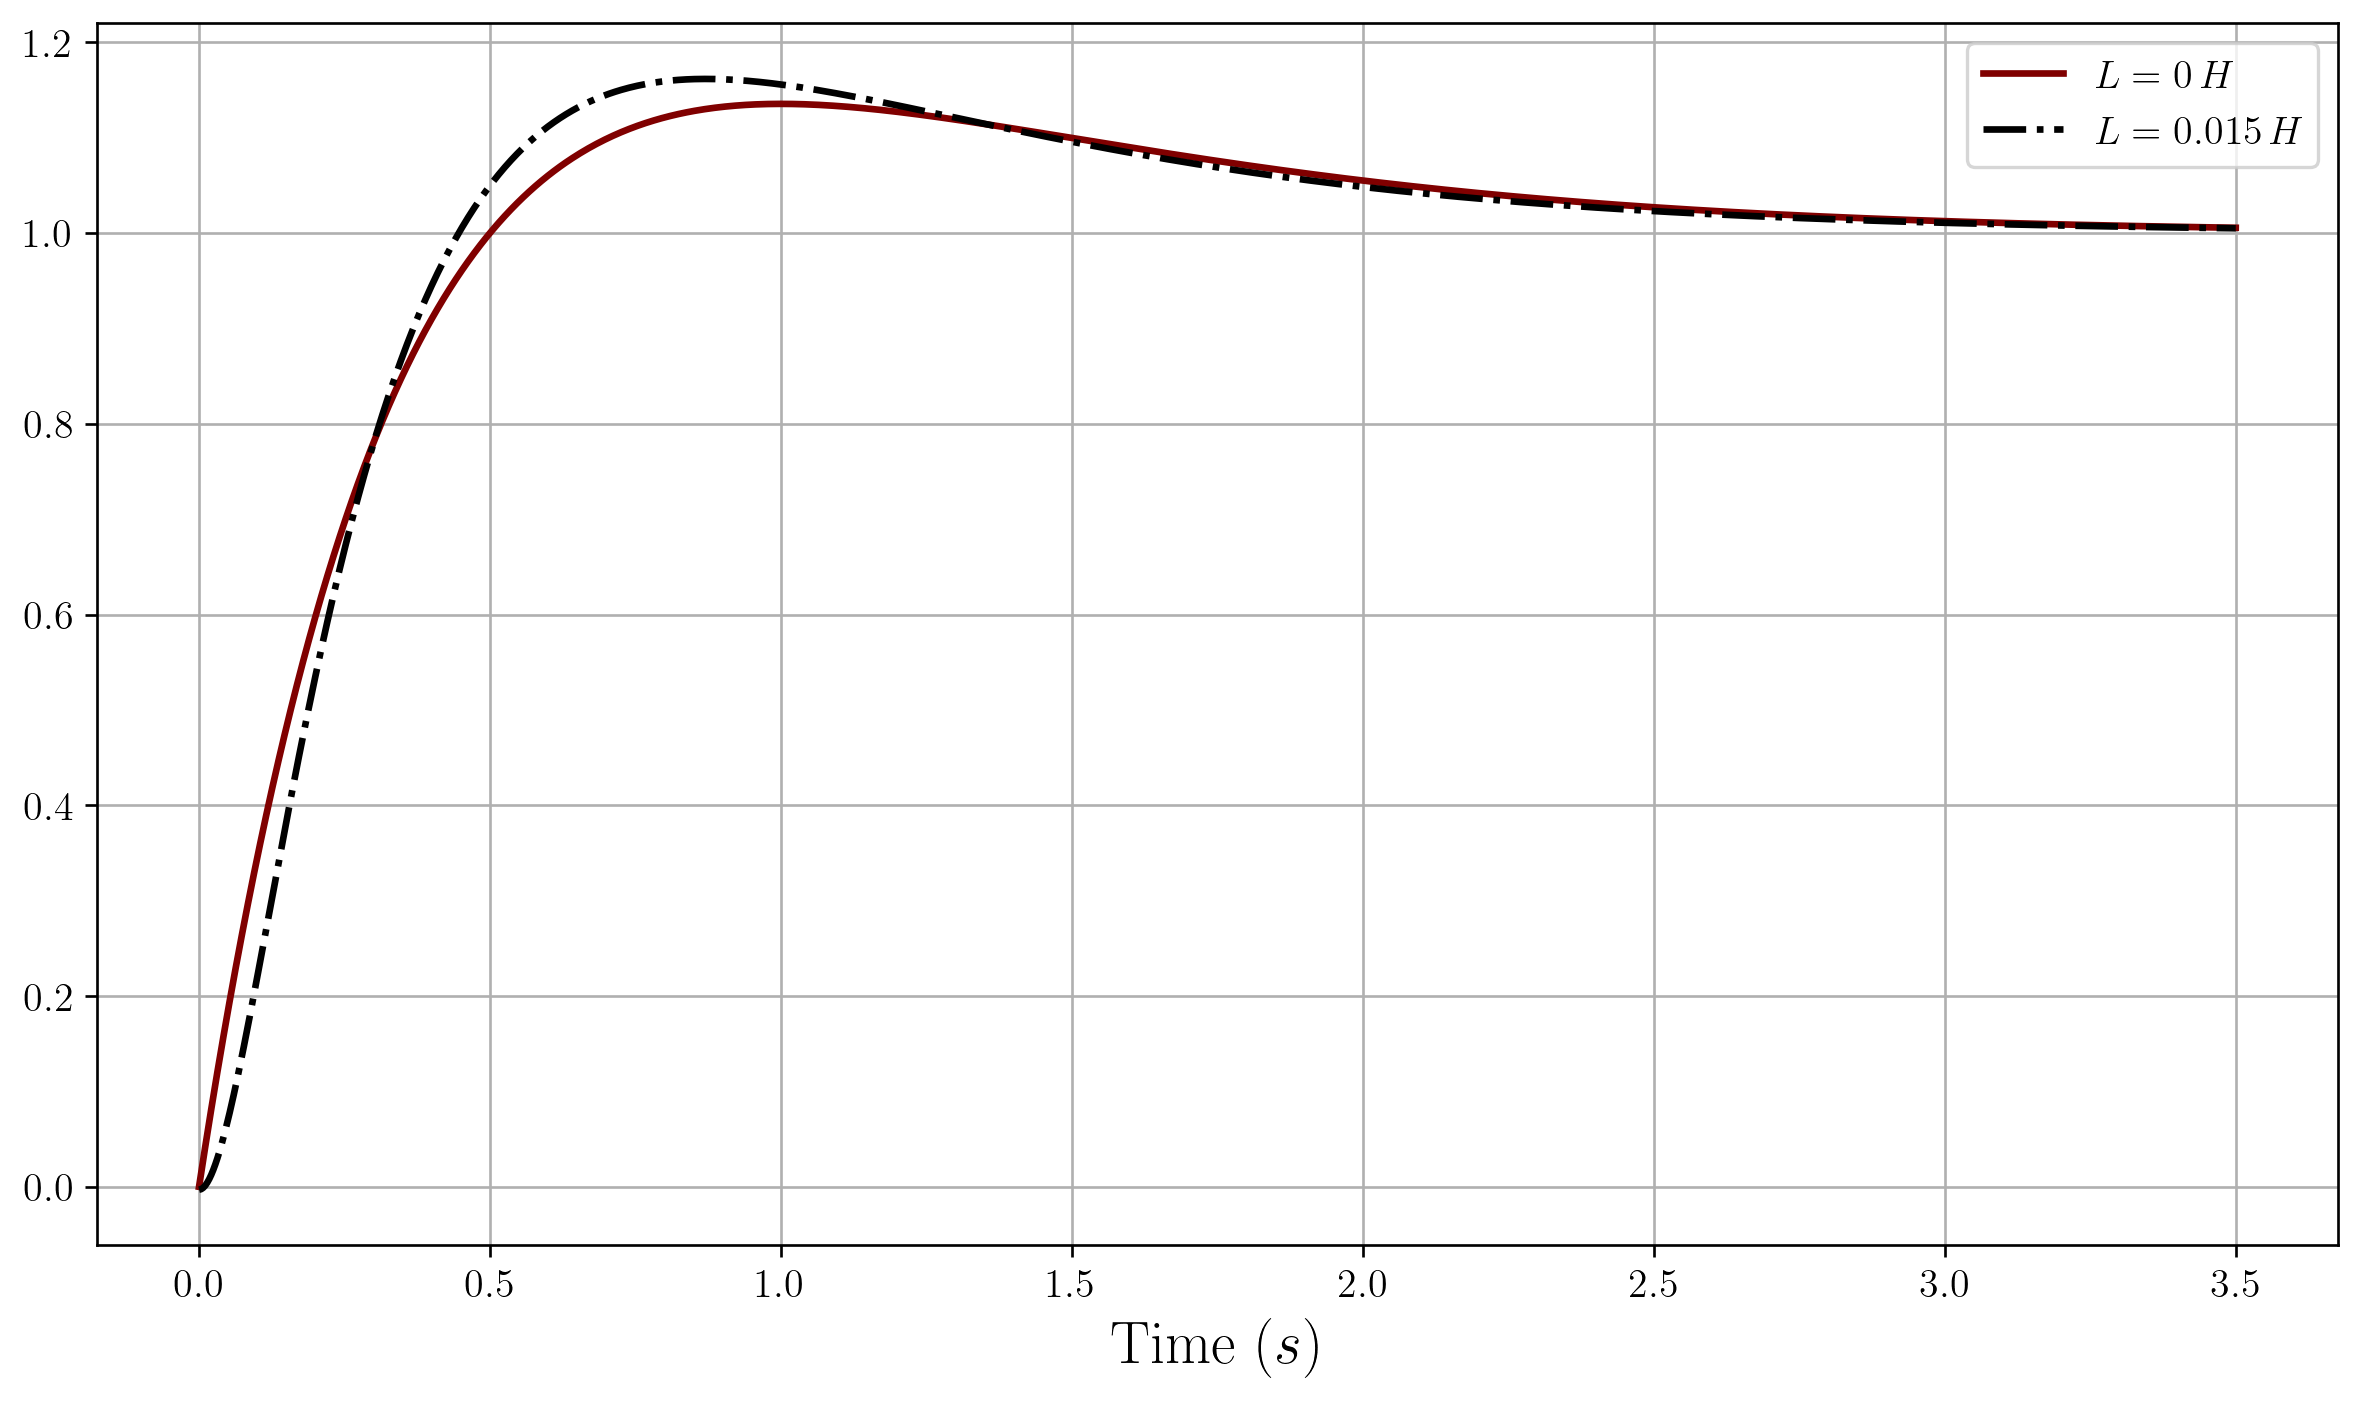

In [9]:
# Plotting
time = np.linspace(0, 3.5, 1000)
th_tA_lamb, th_tB_lamb = sp.lambdify(t, th_tA, modules='numpy'), sp.lambdify(t, th_tB, modules='numpy')
plt.plot(time, th_tA_lamb(time), label=r'$L=0\,H$')
plt.plot(time, th_tB_lamb(time), label=r'$L=0.015\,H$', ls='-.')
plt.xlabel('Time ($s$)')
plt.legend()
plt.show()